Carpeta creada o existente: ../files/plots
Archivo guardado en: ../files/plots\news.png


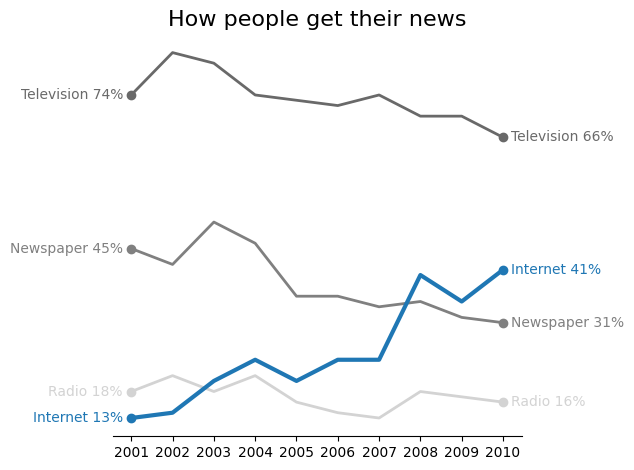

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.figure()

colors = {
    'Television': 'dimgray',
    'Newspaper': 'gray',
    'Internet': 'tab:blue',
    'Radio': 'lightgrey'
}

zorder = {
    'Television': 1,
    'Newspaper': 1,
    'Internet': 2,
    'Radio': 1,
}

linewidths = {
    'Television': 2,
    'Newspaper': 2,
    'Internet': 3,
    'Radio': 2,
}

df = pd.read_csv("../files/input/news.csv", index_col=0)
for col in df.columns:
    plt.plot(df[col], 
        color = colors[col],
        label=col,
        zorder = zorder[col],
        linewidth = linewidths[col],)

plt.title("How people get their news", fontsize=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
#plt.legend(loc="upper right")

for col in df.columns:
    first_year = df.index[0]
    plt.scatter(
        x= first_year,
        y=df[col][first_year],
        color = colors[col],
        zorder = zorder[col],
    )

    plt.text(
        first_year - 0.2,
        df[col][first_year],
        col + " " + str(df[col][first_year]) + "%",
        ha='right',
        va='center',
        color=colors[col],
    )

    plt.text(
        last_year + 0.2,
        df[col][last_year],
        col + " " + str(df[col][last_year]) + "%",
        ha='left',
        va='center',
        color=colors[col],
    )

    last_year = df.index[-1]
    plt.scatter(
        x= last_year,
        y=df[col][last_year],
        color = colors[col],
    )

    plt.xticks(
        ticks=df.index,
        labels= df.index,
        ha= 'center',
    )

plt.tight_layout()
output_dir = "../files/plots"
os.makedirs(output_dir, exist_ok=True)  # Crea el directorio si no existe
print(f"Carpeta creada o existente: {output_dir}")

# Guardar la imagen en el directorio
output_file = os.path.join(output_dir, "news.png")
plt.savefig(output_file)
print(f"Archivo guardado en: {output_file}")
plt.show()